In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
# Read

csv_path = "Laptops_Data_clean.csv"
df = pd.read_csv(csv_path,encoding='latin-1')

df.head()

Company Memory_Structure_Categories          Gpu_Type Gpu_Company  \
0    Asus                      Hybrid  GeForce GTX 1080      Nvidia   
1  Lenovo                      Hybrid  GeForce GTX 980M      Nvidia   
2  Lenovo                      Hybrid  GeForce GTX 980M      Nvidia   
3  Lenovo                      Hybrid  GeForce GTX 1070      Nvidia   
4  Lenovo                      Hybrid  GeForce GTX 980M      Nvidia   

        OpSys Cpu_Company  Inches  CPU_Frequency_Numeric  Ram_Numeric  \
0  Windows 10       Intel    17.3                    2.9           32   
1  Windows 10       Intel    17.3                    2.7           32   
2  Windows 10       Intel    17.3                    2.7           16   
3  Windows 10       Intel    17.3                    2.7           32   
4  Windows 10       Intel    17.3                    2.6           16   

   Size_Numeric  Weight_Numberic  Price_dollars  
0           512              4.7           4279  
1           512              4.6           3564  
2           256              4.6           3025  
3           256              4.6           2929  
4           128              4.6           2519

In [4]:
# Profile overview of dataframe
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title='Pandas Profiling Report', html={'style':{'full_width':True}})
profile.to_notebook_iframe()

In [6]:
df[["Company","Cpu_Company","Memory_Structure_Categories","Gpu","OpSys"]]

KeyError: "['Gpu'] not in index"

In [24]:
df = df.drop(["Gpu_Type"], axis=1)

In [25]:
column_names_for_onehot = df[["Company","Cpu_Company","Memory_Structure_Categories","Gpu_Company","OpSys"]].columns[0:]
df_2 = pd.get_dummies(df, columns=column_names_for_onehot)

In [26]:
df_2
df_2.to_csv("laptop_updated.csv", encoding="utf-8", index=False)

In [28]:
df_2

Inches  CPU_Frequency_Numeric  Ram_Numeric  Size_Numeric  \
0       17.3                   2.90           32           512   
1       17.3                   2.70           32           512   
2       17.3                   2.70           16           256   
3       17.3                   2.70           32           256   
4       17.3                   2.60           16           128   
...      ...                    ...          ...           ...   
1297    13.3                   2.50            8           256   
1298    10.1                   1.44            4            64   
1299    10.1                   1.44            4            64   
1300    10.1                   1.44            4            64   
1301    10.1                   1.44            4            64   

      Weight_Numberic  Price_dollars  Company_Acer  Company_Apple  \
0                4.70           4279             0              0   
1                4.60           3564             0              0   
2                4.60           3025             0              0   
3                4.60           2929             0              0   
4                4.60           2519             0              0   
...               ...            ...           ...            ...   
1297             0.81           1649             0              0   
1298             0.69            711             0              0   
1299             0.69            604             0              0   
1300             0.69            527             0              0   
1301             0.69            351             0              0   

      Company_Asus  Company_Chuwi  ...  Gpu_Company_Nvidia  OpSys_Android  \
0                1              0  ...                   1              0   
1                0              0  ...                   1              0   
2                0              0  ...                   1              0   
3                0              0  ...                   1              0   
4                0              0  ...                   1              0   
...            ...            ...  ...                 ...            ...   
1297             0              0  ...                   0              0   
1298             0              0  ...                   0              0   
1299             0              0  ...                   0              1   
1300             0              0  ...                   0              0   
1301             0              0  ...                   0              1   

      OpSys_Chrome OS  OpSys_Linux  OpSys_Mac OS X  OpSys_No OS  \
0                   0            0               0            0   
1                   0            0               0            0   
2                   0            0               0            0   
3                   0            0               0            0   
4                   0            0               0            0   
...               ...          ...             ...          ...   
1297                0            0               0            0   
1298                0            0               0            0   
1299                0            0               0            0   
1300                0            0               0            0   
1301                0            0               0            0   

      OpSys_Windows 10  OpSys_Windows 10 S  OpSys_Windows 7  OpSys_macOS  
0                    1                   0                0            0  
1                    1                   0                0            0  
2                    1                   0                0            0  
3                    1                   0                0            0  
4                    1                   0                0            0  
...                ...                 ...              ...          ...  
1297                 1                   0                0            0  
1298                 1                   0            

Highest correlation with price:


Price_dollars                         1.000000
Ram_Numeric                           0.742909
CPU_Frequency_Numeric                 0.430120
Gpu_Company_Nvidia                    0.348573
Memory_Structure_Categories_Hybrid    0.295193
Memory_Structure_Categories_SSD       0.267199
Company_Razer                         0.233762
Weight_Numberic                       0.209861
Cpu_Company_Intel                     0.180257
Company_MSI                           0.180028
OpSys_Windows 7                       0.152317
OpSys_Windows 10                      0.136198
OpSys_macOS                           0.089894
Company_Apple                         0.080638
Inches                                0.067318
Company_LG                            0.067041
Company_Dell                          0.048247
Company_Microsoft                     0.047539
Company_Samsung                       0.043170
Company_Toshiba                       0.040252
Company_Google                        0.038077
OpSys_Windows

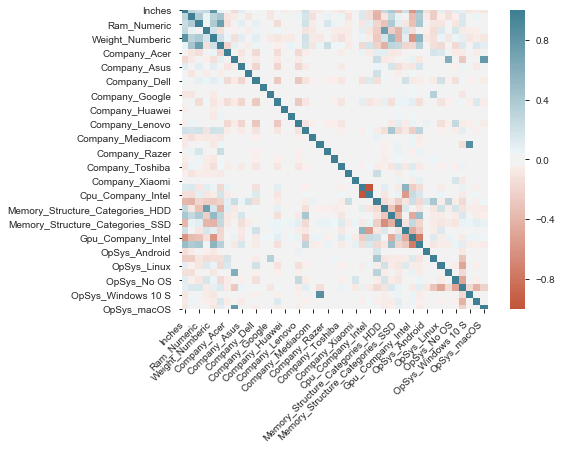

In [10]:
# Correlation heat map

corr = df_2.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

# View highest correlation for specific variable

print("Highest correlation with price:")
corr["Price_dollars"].sort_values(ascending=False)

## Data Pre-Processing

In [29]:
X = df_2.drop(["Price_dollars"], axis=1)
y = df_2["Price_dollars"]
print(X.shape, y.shape)

(1302, 42) (1302,)


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1)

In [32]:
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [33]:
X_train_scaled

array([[0.6626506 , 0.25925926, 0.03225806, ..., 0.        , 0.        ,
        0.        ],
       [0.46987952, 0.33333333, 0.09677419, ..., 0.        , 0.        ,
        0.        ],
       [0.18072289, 0.25925926, 0.03225806, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.46987952, 0.51851852, 0.09677419, ..., 0.        , 0.        ,
        0.        ],
       [0.86746988, 0.25925926, 0.09677419, ..., 0.        , 0.        ,
        0.        ],
       [0.18072289, 0.25925926, 0.03225806, ..., 0.        , 0.        ,
        0.        ]])

In [34]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fitting our model with all of our features in X
model.fit(X_train_scaled, y_train)

score = model.score(X_test_scaled, y_test)
print(f"R2 Score: {score}")

R2 Score: 0.6977709309159265


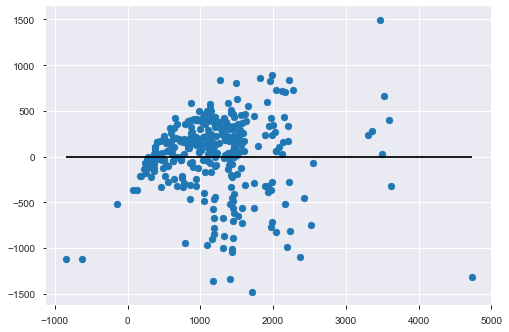

In [35]:
predictions = model.predict(X_test_scaled)
# Plot Residuals
plt.scatter(predictions, predictions - y_test)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

In [37]:
predictions

array([ 678., 1438., 1250., 1206., -140.,  860., 1366.,  530.,  326.,
        402., 2038.,   78., 1142.,  946., 2428.,  718., 1118., 1946.,
       1982., 1170.,  858.,  394., 1510.,  964., 1454., 2234., 2214.,
        514., 1206., 1458.,  254., 1994.,  714., 1506.,  942., 1126.,
       1050., 1174., 1430.,  664., 1106., 1610.,  918.,  826., 1136.,
       1330., 1442., 1050.,  746.,  854., 1660., 2026., 1050., 1158.,
        744.,  126., 1122.,  598., 1710., 1230.,  826., 1198., 1352.,
       1234., 1126., 1374.,  854., 1334., 1586., 1186.,  404., 1490.,
        586., 2148., 1338.,  450.,  382.,  478., 2122., 1596., 1438.,
       1386.,  794.,  734.,  942.,  874.,  604.,  862., 1462.,  890.,
       1122., -622.,  316.,  922., 1526., 1210.,  794., 3474., 1538.,
        480., 1438., 2554., 3590., 1978., 1066., 1462., 1426.,  846.,
       1596.,  374., 1062.,  370., 1478.,  382., 1398., 1310., 1498.,
       1004., 3358., 2202.,  578., 1198., 1450.,  378.,  494., 1430.,
       1434.,  872.,

## Random Forest

In [60]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf = rf.fit(X_train_scaled, y_train)
rf.score(X_test_scaled, y_test)

0.8047660362987735

In [63]:
predictions = rf.predict(X_test_scaled)
len(X_test_scaled)

326

In [64]:
len(y_test)

326

In [65]:
result = pd.DataFrame({'Actual': y_test, 'Predicted': predictions, 'pctDiff': round(abs((predictions-y_test)*100/y_test),1)})
result

Actual    Predicted  pctDiff
1232     317   374.986252     18.3
1030    2452  1706.188000     30.4
163     1099   952.037767     13.4
1012    1216  1089.643000     10.4
711      384   367.288250      4.4
...      ...          ...      ...
34      1098  2429.273000    121.2
85       886   683.341300     22.9
978      703   824.738000     17.3
156     2299  1871.661286     18.6
697      736   589.308933     19.9

[326 rows x 3 columns]

## Neural Networks

In [46]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 

NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(256, kernel_initializer='normal',input_dim = 42, activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(128, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(128, kernel_initializer='normal',activation='sigmoid'))
NN_model.add(Dense(128, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(128, kernel_initializer='normal',activation='tanh'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 256)               11008     
_________________________________________________________________
dense_10 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_11 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_12 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_13 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 129       
Total params: 93,569
Trainable params: 93,569
Non-trainable params: 0
__________________________________________________

In [70]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


In [48]:
NN_model.compile(optimizer='adam',
                   loss='mean_absolute_error',
                   metrics=['accuracy'])

NN_model.fit(
    X_train_scaled,
    y_train,
    epochs=100,
    shuffle=True,
    verbose=2
)

Epoch 1/100
 - 1s - loss: 787.0379 - accuracy: 0.0000e+00
Epoch 2/100
 - 0s - loss: 785.8856 - accuracy: 0.0000e+00
Epoch 3/100
 - 0s - loss: 784.7627 - accuracy: 0.0000e+00
Epoch 4/100
 - 0s - loss: 783.5745 - accuracy: 0.0031
Epoch 5/100
 - 0s - loss: 782.4573 - accuracy: 0.0061
Epoch 6/100
 - 0s - loss: 781.3610 - accuracy: 0.0000e+00
Epoch 7/100
 - 0s - loss: 780.2573 - accuracy: 0.0000e+00
Epoch 8/100
 - 0s - loss: 779.1636 - accuracy: 0.0000e+00
Epoch 9/100
 - 0s - loss: 778.0676 - accuracy: 0.0000e+00
Epoch 10/100
 - 0s - loss: 776.9537 - accuracy: 0.0000e+00
Epoch 11/100
 - 0s - loss: 775.8504 - accuracy: 0.0000e+00
Epoch 12/100
 - 0s - loss: 774.7604 - accuracy: 0.0031
Epoch 13/100
 - 0s - loss: 773.6386 - accuracy: 0.0061
Epoch 14/100
 - 0s - loss: 772.5378 - accuracy: 0.0000e+00
Epoch 15/100
 - 0s - loss: 771.4583 - accuracy: 0.0000e+00
Epoch 16/100
 - 0s - loss: 770.3750 - accuracy: 0.0000e+00
Epoch 17/100
 - 0s - loss: 769.2636 - accuracy: 0.0000e+00
Epoch 18/100
 - 0s - l